In [104]:
import os
import time
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords
from pylab import plt
from matplotlib.pyplot import plot
from gensim.models.word2vec import Word2Vec
from gensim.corpora.dictionary import Dictionary
from gensim import models
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [105]:
dataset = pd.read_csv(os.path.join(os.getcwd(), "..") + '/Extra/keras_dataset.csv', encoding='utf8')
dataset = dataset[dataset['Keras_Label'] != 1]

print('All Corpus Read')
print(len(dataset))

All Corpus Read
119535


In [106]:
## Filter stop word

stop_words = set(stopwords.words('english'))

stop_words.add('navy')
stop_words.add('navyfederal')
stop_words.add('federal')
stop_words.add('union')
stop_words.add('nfcu')
print(stop_words)## Filter stop word

{'are', 'there', 'than', 'mustn', 'each', 'mightn', 'union', 'very', 'from', 'federal', 'through', 'hers', "don't", 'i', 'or', 'm', 'hadn', 'so', 'weren', "shan't", 'her', 'own', 'myself', 've', 'an', 'couldn', 'navy', 'my', 'few', 'most', 'any', 'shouldn', 'against', 'being', 'ourselves', 'which', 'be', 'is', 'been', 'where', 'nor', "isn't", 'what', 'we', 'to', 'further', "that'll", 's', 'nfcu', 'aren', 'his', "weren't", 'theirs', 'you', 'ain', 'our', 'himself', 'y', 'on', 'those', 'more', 'wasn', "mustn't", 'at', 'same', 'whom', "you've", 'these', "wasn't", 'their', 'should', 'between', 'because', 'below', 'into', 'some', 'hasn', 'under', "should've", 'd', "haven't", 'navyfederal', 'as', 'a', 'in', 'its', 'after', 'itself', 'all', 'yourself', 'themselves', 'does', 'with', 'why', "you're", "you'll", "couldn't", 'was', 'for', 'don', "she's", 'll', "won't", "aren't", 'yourselves', 'if', 'until', 'while', 'will', 'other', 'haven', 'too', 'them', 'that', 'doesn', 'off', 'she', 'am', 'and'

In [107]:
# Filter short length word and stop word
corpus = dataset.NormalizedMessage.values.astype('U')

count = 0
for document in corpus:
    words_list = document.split()
    ##print(words_list)
    resultwords  = [word for word in words_list if len(word) > 2 and word not in stop_words]
    corpus[count] = ' '.join(resultwords)
    count += 1
    
print(type(corpus))
print(corpus[0])
print(len(corpus))

<class 'numpy.ndarray'>
welcome tons locals area traveling hour closest location hard
119535


In [108]:
big_title_string = ' '.join(corpus)
words = big_title_string.split()
print(len(words))

1456820


In [109]:
def train_word2vec(sentences,save_path):
    sentences_seg = []

    for i in sentences:
        sentences_seg.append(i.split())
    print("train_word2vec") 
#     logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    model = Word2Vec(sentences_seg,
                size=200,  
                min_count=5,  
                window=5)     
    
    model = Word2Vec(sentences_seg)   
        
    model.save(save_path)
    return model
 
model =  train_word2vec(corpus,'word2vec.model')
#model = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 
print('Done')

train_word2vec
Done


In [110]:
from collections import Counter 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(words) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(100) 
  
print(most_occur) 

[('credit', 16055), ('cards', 12232), ('get', 11854), ('account', 11445), ('com', 10268), ('money', 10184), ('twitter', 9291), ('would', 9162), ('bank', 9099), ('thank', 8348), ('one', 7669), ('time', 7655), ('like', 7501), ('card', 7430), ('service', 6974), ('love', 6501), ('thanks', 6230), ('hey', 5865), ('years', 5848), ('got', 5768), ('know', 5763), ('need', 5756), ('cannot', 5680), ('loan', 5651), ('good', 5619), ('never', 5577), ('back', 5390), ('still', 5368), ('rooting', 5077), ('egq', 5063), ('call', 4953), ('great', 4930), ('pay', 4796), ('people', 4795), ('help', 4708), ('best', 4688), ('even', 4605), ('going', 4569), ('customer', 4465), ('proud', 4436), ('member', 4184), ('deposit', 4033), ('phone', 3973), ('could', 3883), ('use', 3835), ('make', 3781), ('app', 3777), ('new', 3769), ('since', 3555), ('want', 3523), ('day', 3499), ('told', 3494), ('check', 3473), ('today', 3428), ('pic', 3416), ('way', 3391), ('branch', 3362), ('see', 3341), ('loud', 3338), ('army', 3319), (

In [111]:
print(model[most_occur[0][0]])

[-1.0495265  -1.1099305  -0.8714484  -0.9978221  -0.13691176  0.18182088
  0.5894241   0.6549415  -1.7131728  -0.5051834  -1.446727    0.19843931
  1.2917807  -0.00889613 -0.7047637   0.10274841  1.0673653   0.60785675
 -1.5990106   0.21547541 -0.52267593 -0.9362252   2.1822786  -0.17200801
 -1.0168796  -1.3585621  -0.9834536   1.7161101   0.481265    0.44197828
  0.31946796  0.01286627 -0.05684501  1.1716402  -0.73983526 -2.616857
 -1.0177054   0.5223431  -1.4458153  -0.37004656  0.97536004 -2.130318
  0.896181   -0.30164954  1.2816492  -0.5791883   0.17860389  0.07537866
 -0.2243705  -0.5374809   1.8131485   1.0469724   1.0334024  -1.3944619
 -0.4372861  -0.94636035 -0.29701614  0.38737088 -0.3230953   0.90127695
  0.5817331   0.19255054  1.0795107  -0.5291893  -0.8466287  -0.90842897
  0.19513655  0.44562218  1.3007485   0.18481043 -0.51407355 -0.88982826
  1.7877457   0.5678393  -2.8815362   0.5481729  -0.36774984 -1.0062943
  0.32040536  0.04532935  0.83030903 -0.87312144  0.02049

C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


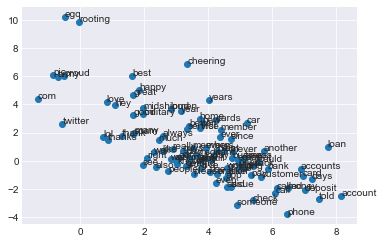

In [112]:
X = []
for e in most_occur:
    X.append(model[e[0]])

pca = decomposition.TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)
result = pca.fit_transform(X)
# Visual word2Vec
plt.scatter(result[:, 0], result[:, 1])
count = 0
for e in most_occur:
    plt.annotate(e[0], xy=(result[count, 0], result[count, 1]))
    count += 1
plt.show()

In [28]:
# # Filter the list of vectors to include only those that Word2Vec has a vector for
# vector_list = [model[word] for word in words if word in model.vocab]

# # Create a list of the words corresponding to these vectors
# words_filtered = [word for word in words if word in model.vocab]

# # Zip the words together with their vector representations
# word_vec_zip = zip(words_filtered, vector_list)

# # Cast to a dict so we can turn it into a DataFrame
# word_vec_dict = dict(word_vec_zip)
# df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
# df.head(3)

In [113]:
# Top 10 similar word
for e in model.most_similar(positive=['football'], topn=20):
   print(e[0], e[1])

watching 0.8779694437980652
movie 0.8695908784866333
beautiful 0.8553117513656616
game 0.8275789022445679
jingle 0.826898455619812
hockey 0.8161332011222839
hot 0.8135170936584473
frangie 0.8081239461898804
delicious 0.8057866096496582
dog 0.8030599355697632
celebration 0.8017356395721436
falcons 0.8009945154190063
memorial 0.7973175644874573
celebrate 0.7960892915725708
boys 0.7957321405410767
uniform 0.7941955327987671
snow 0.7931855916976929
bell 0.790882408618927
ride 0.7901341915130615
fantasy 0.7895349264144897


C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [114]:
def generate_id2wec(word2vec_model):
    gensim_dict = Dictionary()
    gensim_dict.doc2bow(model.wv.vocab.keys(), allow_update=True)
    w2id = {v: k + 1 for k, v in gensim_dict.items()}
    w2vec = {word: model[word] for word in w2id.keys()}
    n_vocabs = len(w2id) + 1
    embedding_weights = np.zeros((n_vocabs, 100))
    for w, index in w2id.items():
        embedding_weights[index, :] = w2vec[w]
    return w2id,embedding_weights

w2id,embedding_weights = generate_id2wec(model)
print(w2id)

{'aaa': 1, 'aaron': 2, 'aarp': 3, 'abandon': 4, 'abandoned': 5, 'abby': 6, 'abc': 7, 'abd': 8, 'abide': 9, 'abiegail': 10, 'abigail': 11, 'abilene': 12, 'abilities': 13, 'ability': 14, 'able': 15, 'abnb': 16, 'abnormal': 17, 'aboard': 18, 'abortion': 19, 'abr': 20, 'abraham': 21, 'abroad': 22, 'absolute': 23, 'absolutely': 24, 'absurd': 25, 'abt': 26, 'abundance': 27, 'abuse': 28, 'abused': 29, 'abuses': 30, 'abusing': 31, 'abusive': 32, 'abysmal': 33, 'academic': 34, 'academy': 35, 'acc': 36, 'accent': 37, 'accept': 38, 'acceptable': 39, 'acceptance': 40, 'accepted': 41, 'accepting': 42, 'accepts': 43, 'acces': 44, 'access': 45, 'accessed': 46, 'accesses': 47, 'accessibility': 48, 'accessible': 49, 'accessing': 50, 'accessories': 51, 'accident': 52, 'accidental': 53, 'accidentally': 54, 'accidents': 55, 'accn': 56, 'accnt': 57, 'accokeek': 58, 'accommodate': 59, 'accommodating': 60, 'accommodations': 61, 'accomplish': 62, 'accomplished': 63, 'accomplishment': 64, 'accomplishments': 65

C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [115]:
# #K-Means
from sklearn.cluster import KMeans, MiniBatchKMeans

# Finds optimal K
def train(X,true_k=10,showLable = False):
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=10000, n_init=1, verbose=False)
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=10000, n_init=2, init_size=1000, batch_size=1500)
    km.fit(X)
    return km.inertia_ 

In [116]:
def plot_cluster(result,newData,numClass):
    plt.figure(2)
    Lab = [[] for i in range(numClass)]
    index = 0
    for labi in result:
        Lab[labi].append(index)
        index += 1
    color = ['oy', 'ob', 'og', 'cs', 'ms', 'bs', 'ks', 'ys', 'yv', 'mv', 'bv', 'kv', 'gv', 'y^', 'm^', 'b^', 'k^', 'g^'] * 3 
    for i in range(numClass):
        x1 = []
        y1 = []
        for ind1 in newData[Lab[i]]:
            # print ind1
            try:
                y1.append(ind1[1])
                x1.append(ind1[0])
            except:
                pass
        plt.plot(x1, y1, color[i])

    
    x1 = []
    y1 = []
    for ind1 in clf.cluster_centers_:
        try:
            y1.append(ind1[1])
            x1.append(ind1[0])
        except:
            pass
    plt.plot(x1, y1, "rv")
    plt.show()

In [117]:
## Using tfidf
vectorizer = TfidfVectorizer(binary = True, max_features = 16000, stop_words=stop_words, ngram_range = (1,1))

newX = vectorizer.fit_transform(corpus)
pca = decomposition.TruncatedSVD(n_components=100, algorithm='randomized', n_iter=100, random_state=122)

print(newX.toarray())    
print(newX.shape)

vocab = np.array(vectorizer.get_feature_names())
print(vocab)
print(len(vocab))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(119535, 16000)
['aaa' 'aaaand' 'aac' ... 'zuckerberg' 'zulu' 'zumwalt']
16000


2 1305.4468347154664
3 1254.8185595863802
4 1239.0842045623353
5 1222.760029651554
6 1226.6736881512975
7 1211.8554496685308
8 1211.071956511216
9 1206.6511872285446
10 1205.6247293053004
11 1201.8094272238059
12 1196.7705999959403
13 1193.2058117744277
14 1192.548532048996
15 1187.9372472780317
16 1186.2951914366768
17 1180.7427072914754
18 1182.2190239769973
19 1180.287075055221


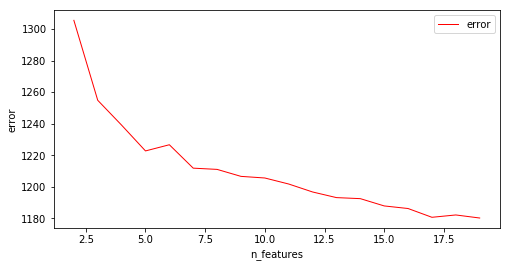

In [34]:
true_ks = []
scores = []
for i in range(2,20,1):        
    score = train(newX,true_k=i)/len(document)
    print(i,score)
    true_ks.append(i)
    scores.append(score)
plt.figure(figsize=(8,4))
plt.plot(true_ks,scores,label="error",color="red",linewidth=1)
plt.xlabel("n_features")
plt.ylabel("error")
plt.legend()
plt.show()

In [130]:
from sklearn.cluster import KMeans, MiniBatchKMeans
true_k = 4
clf = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000)
clf = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=1000, init_size=1000, batch_size=500, random_state = 70)
s = clf.fit(newX)

print(len(clf.cluster_centers_))
print(clf.cluster_centers_)
print("---------------------")  

i = 1
dic = {}
while i < len(clf.labels_):
    if clf.labels_[i] in dic:
        dic[clf.labels_[i]] += 1
    else:
        dic[clf.labels_[i]] = 1
    i = i + 1
print(dic)
print("---------------------")

print("Top terms per cluster:")
order_centroids = clf.cluster_centers_.argsort()[:, ::-1]

topic_matrix = []
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    words = []
    for ind in order_centroids[i, :15]:
        print(' %s' % vocab[ind], end='')
        words.append(vocab[ind]) 
    print()
    topic_matrix.append(words.copy())

4
[[3.66817792e-05 8.97137035e-06 1.56538060e-05 ... 3.36857161e-05
  4.12683491e-05 2.05415877e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
---------------------
{0: 104182, 2: 4160, 1: 6131, 3: 5061}
---------------------
Top terms per cluster:
Cluster 0: thank credit proud loud cheering get money account midshipmen good like one would great service
Cluster 1: love best bank credit ever member years service great customer since thank guys would always
Cluster 2: thanks credit service much great awesome sharing info response okay good know help guys love
Cluster 3: egq rooting hey cards twitter com army pic beat vet help apac men business always


(119535, 2)


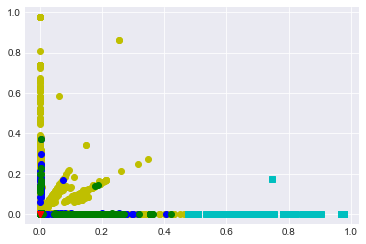

In [131]:
pca = decomposition.TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)
PCANewX = pca.fit_transform(newX)
print(PCANewX.shape)

result = list(clf.predict(newX))

plot_cluster(result,PCANewX,true_k)

In [132]:
topic1 = ['service', 'customer', 'experience', 'call', 'representative', 'rep', 'manager', 'email', 'answer']
topic2 = ['loan', 'mortage', 'refinance', 'lender', 'insurance']
topic3 = ['withdrawal', 'charge', 'fee', 'deposit', 'balance', 'payment', 'checking', 'transfer', 'fee']
topic4 = ['app', 'mobile', 'website', 'log', 'access', 'online', 'update', 'system', 'desktop']
#topic5 = ['rooting','cheering', 'midshipmen', 'notre', 'loud']
topic_matrix[0] = topic1
topic_matrix[1] = topic2
topic_matrix[2] = topic3
topic_matrix[3] = topic4
#topic_matrix[4] = topic5

C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


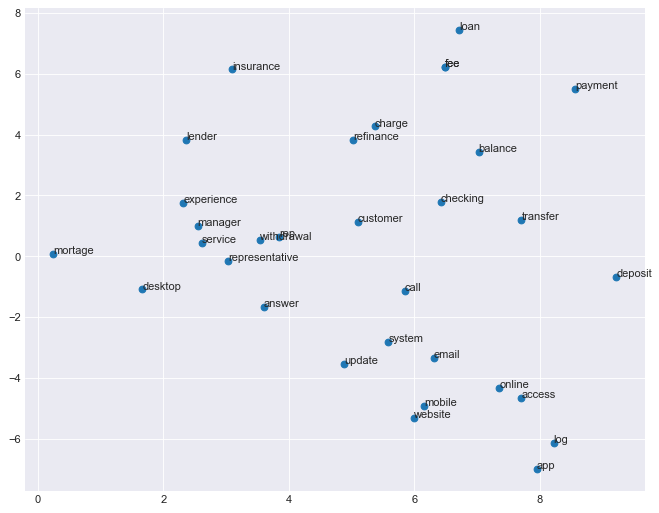

In [135]:
X = []
for keyword_list in topic_matrix:
    for word in keyword_list:
        X.append(model[word])

pca = decomposition.TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=1)
result = pca.fit_transform(X)
# Visual word2Vec
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(result[:, 0], result[:, 1])
count = 0
for keyword_list in topic_matrix:
    for word in keyword_list:
        plt.annotate(word, xy=(result[count, 0], result[count, 1]))
        count += 1
plt.show()

In [38]:
## Trend
dataset = pd.read_csv(os.getcwd() + '/keras_dataset.csv', encoding='utf8')
org_corpus = dataset.Message.values
dataset = dataset[dataset.Keras_Label != 1]
corpus = dataset.NormalizedMessage.values

In [39]:
count = 0
for document in corpus:
    document = str(document)
    words_list = document.split()
    resultwords  = [word for word in words_list if word in w2id]
    corpus[count] = ' '.join(resultwords)
    count += 1
print(corpus[0])

welcome tons locals area traveling hour closest location hard


In [40]:
def relationship(str_1, list_2):
    list_1 = str_1.split()

    score = 0
    for word_1 in list_1:
        for word_2 in list_2:
            score += model.similarity(word_1, word_2)
    return score / (len(list_1) * len(list_2))

In [76]:
index = 602
topic_id = 0
print(corpus[index])
print(topic_matrix[topic_id])
print(relationship(corpus[index], topic_matrix[topic_id]))

living life record clearly show actual graduate live ext route live chance control dose killer skills theory truth power
['service', 'customer', 'experience', 'call', 'representative', 'rep', 'manager', 'email', 'answer']
0.03769347504426709


C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys


In [77]:
from gensim.matutils import softcossim

sent_1 = corpus[index].split()
documents = [sent_1, topic_matrix[topic_id]]
dictionary = Dictionary(documents)
similarity_matrix = model.wv.similarity_matrix(dictionary)
#similarity_matrix = model.wv.similarity_matrix(dictionary)
sent_1 = dictionary.doc2bow(corpus[index].split())
sent_2 = dictionary.doc2bow(topic_matrix[topic_id])

print(softcossim(sent_1, sent_2, similarity_matrix))

0.006782337318045732


C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  
C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  # This is added back by InteractiveShellApp.init_path()


In [78]:
score = np.zeros((len(corpus), 2))
for i in range(len(corpus)):
    if len(corpus[i].split()) > 0:
        for j in range(1):
            # Compute soft cosine similarity
            
#             dictionary = Dictionary([corpus[i].split(), topic_matrix[topic_id]])
#             similarity_matrix = model.wv.similarity_matrix(dictionary)
#             sent_1 = dictionary.doc2bow(corpus[i].split())
#             sent_2 = dictionary.doc2bow(topic_matrix[0])

#             score[i][j] = softcossim(sent_1, sent_2, similarity_matrix)
            score[i][j] = relationship(corpus[i], topic_matrix[topic_id])
    else:
        for j in range(1):
            score[i][j] = 0
        
print(score)
from scipy import stats
print(stats.describe(score))

C:\Users\yugua\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys


[[ 0.06562191  0.        ]
 [ 0.08580671  0.        ]
 [ 0.12030182  0.        ]
 ...
 [-0.05991333  0.        ]
 [ 0.12807279  0.        ]
 [ 0.07633312  0.        ]]
DescribeResult(nobs=119535, minmax=(array([-0.26448647,  0.        ]), array([0.52777416, 0.        ])), mean=array([0.10785622, 0.        ]), variance=array([0.00835996, 0.        ]), skewness=array([-0.29172116,  0.        ]), kurtosis=array([ 0.44466463, -3.        ]))


In [90]:
topic_list = []
for i in range(len(corpus)):
    if score[i][0] > 0.3:
        topic_list.append(corpus[i])
print(topic_list[0])
print(len(topic_list))

upset
1659


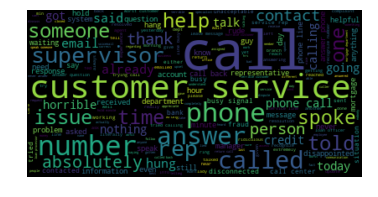

In [91]:
topic_string = ' '.join(topic_list)
wordcloud = WordCloud().generate(topic_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [83]:
df = pd.DataFrame({'Topic1Prob': score[:, 0], 'Sentiment': dataset.Keras_Label, 'Time': pd.to_datetime(dataset.CreatedTime)})
#df = pd.DataFrame({'Topic1Prob': score[:, 0], 'Sentiment': dataset.Polarity, 'Time': pd.to_datetime(dataset.CreatedTime)})
print(df)

        Topic1Prob  Sentiment                Time
2         0.065622          2 2020-01-30 19:07:00
4         0.085807          0 2020-01-30 17:53:00
6         0.120302          0 2020-01-30 17:09:00
8         0.174625          0 2020-01-30 17:00:00
9         0.011970          2 2020-01-30 16:37:00
10        0.255232          2 2020-01-30 16:36:00
14        0.380234          0 2020-01-30 16:21:00
15        0.121595          2 2020-01-30 15:02:00
16        0.061344          2 2020-01-30 10:10:00
20        0.124094          0 2020-01-30 05:44:00
21        0.114098          0 2020-01-30 05:05:00
23        0.162941          2 2020-01-30 04:42:00
24        0.058043          0 2020-01-30 04:42:00
25        0.058043          0 2020-01-30 04:42:00
26        0.114710          2 2020-01-30 03:59:00
27        0.142550          0 2020-01-29 21:39:00
28        0.057431          2 2020-01-29 20:43:00
30        0.207757          2 2020-01-29 19:58:00
31        0.216822          0 2020-01-29 19:56:00


In [92]:
prop = 0.3
x = datetime.datetime(2018, 10, 1)
y = datetime.datetime(2019, 4, 1)

for index, row in df.iterrows():
    if row.Topic1Prob > prop: # and row.Time > x and row.Time < y:
        print(index, row.Sentiment, org_corpus[index])

14 0 @NavyFederal y’all about to upset me.
131 0 @NavyFederal I’ve sent a DM. However, I will NOT let up until this escalation is sent through the proper corporate channels and I am contacted ASAP!
781 0 @NHL @HockeyByDesign @NavyFederal @Avalanche @adidashockey So awful.
1090 2 @NavyFederal I don't know what you guys are doing, in terms of customer service, but please keep doing it. The CSR I spoke with today was super professional, helpful, and patient. 10/10.
1164 0 @NavyFederalHelp I emailed your social media supervisor and never heard back- how do I get ahold of someone to help me?


Reprehensible. @veteransunited will likely appreciate their business.

1 (888) 842-6328  umber for help all day, no one picks up?

Dm'ing it now.
1226 0 @NavyFederal why do I consistently receive horrible customer service when I call.
1481 0 @NavyFederal I called customer service already,  waiting for a call back
1499 0 Sooo disappointed! @NavyFederal does not care about its customers! I’ve been given

6820 0 @NavyFederal She reached out to tell me that my new loan processor will contact me in a few days. Really!
6889 0 @NavyFederalHelp The guy we spoke to on THURSDAY said we'd hear by yesterday 8/26. Nothing. We have a massively incorrect LE package & I just have to wait for her to call. So I have to call the number & wait 20 min after we already took 1.5 hrs on the phone?
6890 0 @NavyFederalHelp we applied over the phone (1.5 hours) for a refi on 8/22 & waited for a LO to call us and NO ONE ever did. then I get the LE pkg today and ALL the numbers are WRONG! There is NO direct contact with the LO & a return label & Fed EX pkg. ????????
6905 0 @NavyFederal needs to fire their whole mortgage department. I’m fed up with the snarky emails from my loan processor and her supervisor. #3daysfromclosing #nocommunication #va #homeloan #FirstTimeHomeBuyer #NeverAgain @NavyFederalHelp
6906 0 @NavyFederal needs to fire their whole mortgage department. I’m fed up with the snarky emails from my l

12600 0 I called @NavyFederal and the call was about to connect to the representative. There was an interruption and then the customer representative could not hear me at all through the phone. After that I called back again and it stated it is unavailable to take calls at this time??.
12809 2 @kayanneXO @tinkksworld @NavyFederal I finally called the customer service line and got through
12830 0 @NavyFederal its all lies nothing has changed
12859 0 @kayanneXO @NavyFederal Neither can I!
12862 2 Update: @NavyFederal has resolved the issue.
13092 0 @NavyFederal @NavyFederalHelp why are your phone lines down? I need help!
13093 0 @NavyFederal @NavyFederalHelp why are your phone lines down? I need help!
13148 0 @NavyFederal @NavyFederalHelp so what’s up??? Who I gotta call?? Where the reps at?? This ain’t it!!!! Y’all trippin
13149 0 @NavyFederal @NavyFederalHelp so what’s up??? Who I gotta call?? Where the reps at?? This ain’t it!!!! Y’all trippin
13166 0 #ShowMeTheMoney @NavyFederal!!! T

27310 2 So thankful for @NavyFederal’s customer service. This rep is going over & beyond to handle my situation. Thank you!
27507 0 Having the worst experience here at @NavyFederal
27535 2 @NavyFederalHelp your service is an absolute Gem!!!  thank you for answering my call at 4 am
27577 0 @NavyFederal I already tried that. The reps are not helpful. They don't care about my situation. I'm just another caller to you guys
27603 0 @NavyFederal I need ANSWERS!!! I was a a branch and had a HORRIBLE experience with one of your employees!!!! Terrible customer customer!
27839 0 So Not Only Did @NavyFederal  Lie Last Night About Updating Phone Numbers, They Told Me Wrong Information To Manipulate Another Phone Call, Ive Told Them Several Times I Dont Want To Call Their Call Centers, They Gave Wrong Info Yet Again
27942 0 @NavyFederalHelp’s customer service over the phone literally sucks lmao 

Asked a simple question about my account and got attitude in return??
28849 0 @NavyFederal Asked them t

40040 0 @NavyFederal you have the worst customer service
40079 0 @NavyFederalHelp Nothing to discuss it’s been said and done.
40331 0 I am highly disappointed in @NavyFederalHelp customer service this morning. A 14min wait to speak with a representative? Really?!
40332 0 I am highly disappointed in @NavyFederal customer service this morning. A 14min wait to speak with a representative? Really?!
40354 2 @NavyFederalHelp Did you get breached? Rep on the phone tells me a "known exploit accessed your account" with no additional information.
40416 0 @NavyFederal  I have waiting for 2 hours and 12 minutes to speak to someone in the fraud department when I was told it would be 5 min.
40417 0 @NavyFederal, on hold for an hour and counting to talk with your fraud department! This is pretty terrible customer service.
40581 0 @NavyFederalHelp Called and was told “they’re really busy” no excuse I’m still a customer, rethinking a mortgage with you guys
40582 0 @NavyFederalHelp Haven’t got in contac

46390 0 @USATHEBEST1 @NavyFederal @USAA This was before 9:00 am and he said I was his 5th caller regarding this issue.  If we flood them with calls, maybe they will reconsider.
46844 0 @NavyFederal #social response time dropped from 19 minutes in 2015 to 10 Min in 2017. Go @GAadams_ :) #custserv #ccexpo
46851 0 @NavyFederalHelp just hung up on me ?? i neeeeddd help
47017 2 shoutout to @NavyFederal their customer service is A1
47264 0 @NavyFederal just had the worse experience here! I get doing your job but not being so rude about!
47344 0 @WellsFargo attempt fraud on me @NavyFederal
47399 0 @NavyFederal Was told sec dept not open
47416 2 I wish I had asked for the name of the @NavyFederal rep that just spoke to me... best customer service I've ever experienced! ????????
47442 0 @NavyFederal @forrester You guys never help me when I call in ????
47449 0 Horrible horrible horrible @NavyFederal this morning. Soo disappointed ??
47807 0 @NavyFederal the message was not
 Responded to.
47822 

65223 0 Is that a problem
65268 2 All this paranoia as you sit there with your phone
65347 0 No experience. I talk to my friend Arsène  Arsene Koala.
66066 0 Worst mortgage experience I have ever had!
66611 0 Navy Federal Credit Union  I already have spoken to multiple reps, it's been Excuse after excuse and now they say it won't be until tomorrow.
67232 0 I call them constantly because my loan processor hasn't reached out since 27 Nov and I've called and emailed for a status and closing date.
67525 0 Just ignored any activity on your phone,it's a HOAX.i never answered my phone calls periodically.
67537 0 Don’t bank with them! They are horrible
67624 0 Ticole' Boyer This was not a NFCU problem.
67708 0 ?? I’m surprised she isn’t asking for snail mail or a phone call to a landline.
67792 0 I just spoke to someone when I called and they said they have no update on when they will post. ??
67881 0 What is NFCU position on mortgage loan officers not answering/returning phone calls? I have a

78855 0 Don’t do it!! They are so far behind!! They don’t return phone calls or emails.  The only tome I would get a call would be when the supervisor would get involved.  Processor blames waiting on information when I can prove she had it for weeks.  Worse experience ever at Navy Federal.
78977 2 sherli called and resolved my issue thank you for your COMPRISING
79221 2 I have had to call them a few times about things, they have EXCELLENT customer service??
79477 0 Navy Federal Credit Union I spoke to customer service already.
79537 0 I have too., But I don't answer it. I don't want to  talk to myself
79571 0 They turned me down kind of disappointed.  But there will be a bank that will
79588 0 My answering machine answers unknown numbers with “ hello, you have received this message because I am busy or I don’t recognize your number, leave a message & I will return your call”. 
If it is important a message will be left.
79608 0 I just don’t ever answer a number I don’t recognize
79895 0

92776 0 Also calls wanting your Medicare no. Told them to F off. They hung up.
92859 0 I have had an unacceptable experiece today.I asked a supervisor for a number to corporate to escalate my concerns. She gave me a false number. I called back and a different supervisor informed they dont give corporates number, That i have to go to their website to click on a link to get an address to send a letter.
93275 0 I delete all email I don't recognize nor do I answer calls I don't recognize. And I never order on line.
93289 0 Worst experience ever. I went to another lender because my loan agent was extremely rude! Process was a waste of my time
93485 0 I don't answer phone calls i don't know. Or open email i don't recognize
93688 0 500s is terrible
93859 2 Absolutely.
94100 0 I answer Sheriffs Dept Fraud Division
94356 0 I do not answer any call that is not on my call list.If its a legitimate call they will leave a voice mail then I decide whether to call back or not.
94692 0 Ya, talk about t

103445 0 Im on hold with them now. Its a 66 minute wait but i WILL speak with someone. This is ridiculous.
103479 0 It just me! Just tried calling them...there was a 33 minute wait??
103501 0 So now we can't even call?
103626 0 Just got off the phone with rep.  Was told to check back after 0600.  There has been a delay in posting.
103636 0 They’re already getting tons of phones calls. I called and they said 38 min wait time ????‍♀️
103639 0 I'm on the phone with someone now because we didn't get ours either????
103681 0 Me here too the wait is 32 minutes  I just  hung  up
103814 0 I don’t answer my phone to any numbers I don’t recognize or expect.  I received a call today from Vietnam!
103946 0 Jan Winans-Lagorio or just don’t answer unknown callers
104062 0 When IRS called me, what I told them they hung up on me. Lol there was a few 4 lettered words in there. I know IRS doesn't call.
104816 0 You all had this same problem yesterday
104857 2 Touché
We bank with 2 different CU.
105223 0

122221 0 Neither have I!
122408 2 The NFCU is  great on customer service. That's been my experience.
122620 0 Answer "Sheriffs office, Fraud division".   Very few calls now.
122628 0 Pick up the call and immediately hang up. Don’t even let them leave a message!
122763 0 Don't answer calls you don't recognize.  They can leave a message.
122779 0 Don't answer those calls.
122891 0 I also don't answer phone calls unless Name appears. If it is a friend & I don't have their phone #, they can leave message on voice mail.
123228 0 I have spoken to a rep and she’s suppose to call me
124385 2 Absolutely.
124392 0 That does nothing
124438 0 Navy Federal Credit Union I have been on the phone with Navy Fed 15 times today. I still have not been able to 1) Talk to a supervisor, and 2) Get a fax sent. 
That's horr9ble customer service. You guys already have my contact info as I have stated it 15 times in each phone call I've made already.
124461 2 Absolutely !!!
124518 2 Absolutely!
124691 2 Absolute

158314 0 I just send those unknown numbers to VM. If they're legit, they leave a msg. If not, they just hang up.
159194 0 been on hold for over 30 minutes
159203 0 they are doing customer service bad
159206 0 over 10 minutes. still on hold for customer care.
159210 0 most rude conversation . 
real bad customer service.
159230 0 When those calls come in I immediately block it. Them my phone just memos me that a call was blocked.
159619 0 I like NFCU I just wish the mortgage underwriting department would follow through with returning phone calls!
161211 0 I have called 5 times and no seems to know the answer
161348 0 I don't even answer calls I do know.
162339 0 I did but you all said no ????
162751 2 Absolutely
162798 2 Absolutely
162880 0 I think the fact that they've ignored your question is your answer. It's too bad navy federal sucks.
163212 2 Absolutely
163750 2 Absolutely
163904 0 It is helpful when the incompetent driver is not you.
164316 0 Never have I dealt with such awful cus

187113 0 Still no call from them
187204 0 I sincerely apologize for being rude.
187411 2 Will someone from corporate contact me higher then a call center supervisor. I need to speak to someone higher-up.
187458 0 Sorry but just to confirm he is in lending and not just customer service correct?
187482 0 I did and I have been on hold for almost 20 minutes. I just hung up
187599 0 FYI, I received one phone call from the above exchange. They took my "statement" informed me a manager would call me back and never did.  Completely ridiculous!
187605 0 Complaint regarding current interaction with Mortgage Assistant Manager Kevin. Requested his supervisor's information and was denied. --- Email sent.
187621 0 I am wanting to talk about my CD renewal but can not get through on the phone it just has a busy signal ??
187742 0 WHAT SOME OF THE REASON WHY A PERSON DO NOT QUALIFIED.
187812 0 Horrible phone system to get customer service.Terrible. Frustrating.
187890 2 The situation was already handle

202317 0 We sent our loan officer an email  a month ago regarding tax exemption on our loan, no reply. Left several voicemails, no reply. Called her supervisor and left a voice mail, no reply.  Spoke with customer service agent and they don't know how to help. So who holds employees accountable at Navy Fed and how do we speak with someone about our issue?
202323 0 CUSTOMER SERVICE SUCKS!!!!!
203047 0 I did. And they the same thing you are. It still does not answer my question.
203065 0 Disappointed with them
203124 0 I am trying to contact Navy Federal but my phone is not working.  How can I reach NFCU by computer and speak with an agent.
203219 2 I am emailing now, and will comment back here if someone has been helpful with this matter.
203264 0 I have called 5 days in a row to get help with my VCC dispute for a product I never received. I have been told ever time that an email would be routed and someone would contact me. I have received no communication and I am overseas and have wo

In [73]:
print(org_corpus[2])

@NavyFederal You’re welcome. Tons of locals with NF in the area and traveling an hour to the closest location is hard


In [176]:
df.to_csv(os.getcwd() + '/.csv', index=False)

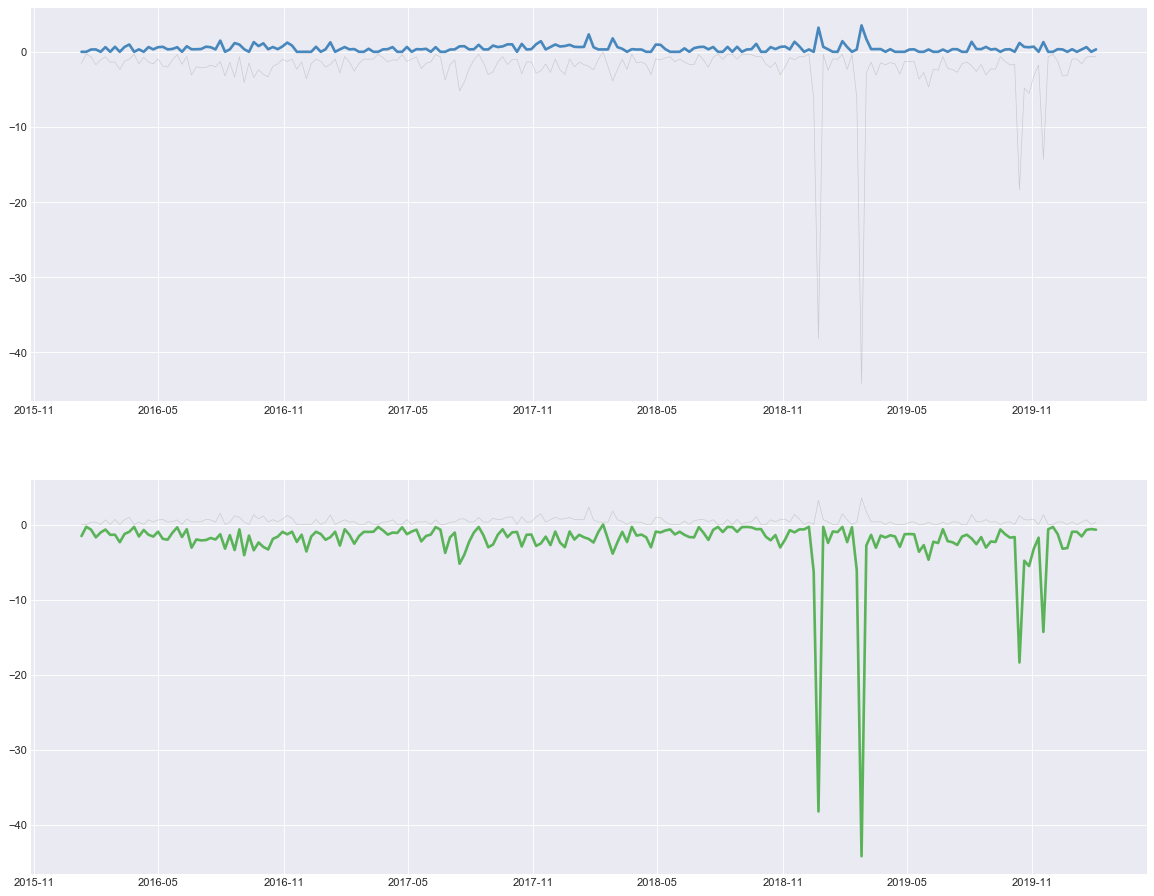

In [93]:
new_df = df[df.Topic1Prob > prop]

pos = [0] * len(new_df)
neg = [0] * len(new_df)

count = 0
for index, row in new_df.iterrows():
    if row['Sentiment'] > 0:
        pos[count] = row['Topic1Prob'] * (row['Sentiment'] - 1)
        neg[count] = 0
    else:
        pos[count] = 0
        neg[count] = row['Topic1Prob'] * (row['Sentiment'] - 1)
    count += 1
    
new_df = pd.DataFrame({'pos': pos, 'neg': neg, 'Time': pd.to_datetime(new_df.Time)})

new_df = new_df.resample('W', on='Time').sum()

week = []
for index, row in new_df.iterrows():
    week.append(index)
    
new_df['Weekly'] = week

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 30), dpi=80, facecolor='w', edgecolor='k')
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
num=0
for column in new_df.drop('Weekly', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(4,1, num)
 
    # plot every groups, but discreet
    for v in new_df.drop('Weekly', axis=1):
        plt.plot(new_df['Weekly'], new_df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(new_df['Weekly'], new_df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)